<a href="https://colab.research.google.com/github/AdithyaAmbati2001/Placement-Prediction-in-3-ML-models/blob/main/Placement_Prediction_Using_all_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#COLLECTION OF DATA


job_data = pd.read_csv("/content/drive/MyDrive/Placement_Data_Class")
job_data.head()

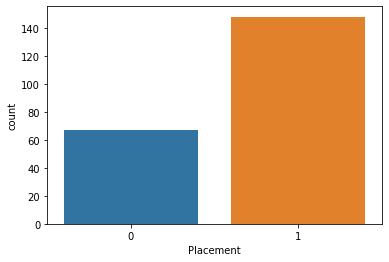

In [ ]:
#DATA ANALYSING

sns.countplot(x="Placement",data=job_data)

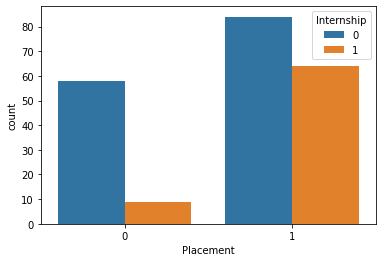

In [ ]:
sns.countplot(x="Placement",hue="Internship",data=job_data)

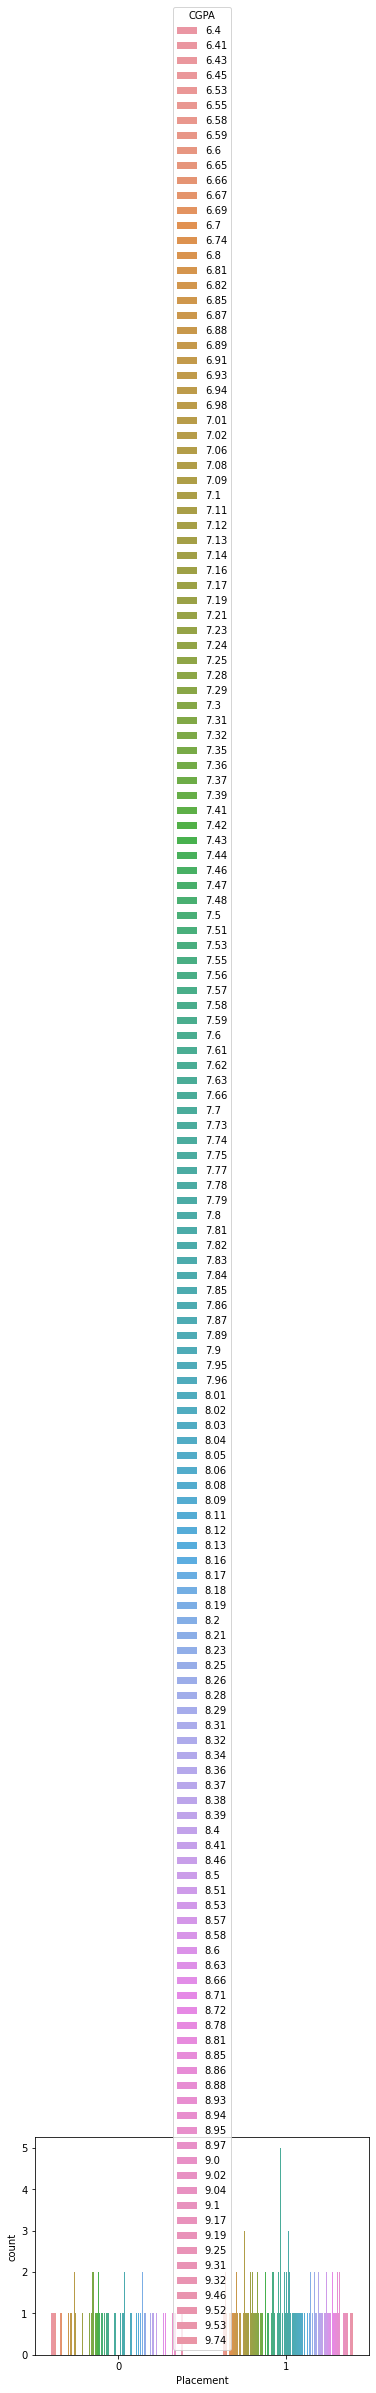

In [ ]:
sns.countplot(x="Placement",hue="CGPA",data=job_data)

In [ ]:
#DATA WRANGLING

job_data.isnull()

,SL_NO,Gender,Aptitude,Grammer,Logical,Code,CGPA,Internship,Branch,Specialization,Placement
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
job_data['Branch'] = LabelEncoder().fit_transform(job_data['Branch'])
job_data['Specialization'] = LabelEncoder().fit_transform(job_data['Specialization'])


In [ ]:
job_data.head()

,SL_NO,Gender,Aptitude,Grammer,Logical,Code,CGPA,Internship,Branch,Specialization,Placement
0,1,M,77,91,55,58,7.57,0,0,0,1
1,2,M,89,78,87,77,8.29,1,2,0,1
2,3,M,75,68,75,64,7.23,1,1,2,1
3,4,M,66,52,66,52,7.43,0,2,1,0
4,5,M,96,74,97,73,6.94,0,0,0,1


In [ ]:
features = ['Aptitude','Grammer','Code','Logical','CGPA','Internship','Branch','Specialization']
X = job_data[features]
y = job_data["Placement"]

In [ ]:
#TRAINING AND TESTING MODEL

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p = model.predict(X_test)

In [ ]:
print(p)

[1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [ ]:
confusion_matrix(y_test,p)

array([[14,  6],
       [ 4, 41]])

In [ ]:
c = accuracy_score(y_test,p)*100
print(c)

84.61538461538461


In [ ]:
lg_pred = model.predict([[77,91,58,55,7.57,0,0,0]])

In [ ]:
lg_pred

array([1])

In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy_score is :",accuracy_score(y_test,y_pred)*100)

Accuracy_score is : 76.92307692307693


In [ ]:
y_pred[0:]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
dt_pred = clf.predict([[77,91,58,55,7.57,0,0,0]])

In [ ]:
dt_pred

array([1])

In [ ]:
#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
a = Sequential()

In [ ]:
a.add(Dense(11,kernel_initializer='random_uniform',activation='relu'))

In [ ]:
a.add(Dense(22,kernel_initializer='random_uniform',activation='relu'))

In [ ]:
a.add(Dense(1,kernel_initializer='random_uniform',activation='sigmoid'))

In [ ]:
a.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
a.fit(X_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
5/5 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.7098
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6864
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6759
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6733
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6798
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6785
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6581
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6560
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6677
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6838
Epoch 11/500
5/5 [===========

In [ ]:
y_pred = a.predict(X_test)

In [ ]:
y_pred = y_pred>0.5

In [ ]:
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
an_pred = a.predict([[77,91,58,55,7.57,0,0,0]])

In [ ]:
an_pred

array([[0.98126566]], dtype=float32)